### 1. Import Necessary Libraries

In [1]:
### 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the Data

In [2]:
cleaned_survey_df = pd.read_csv('../data/cleaned_survey_data.csv')

### 3. Inspect the Data

In [3]:
cleaned_survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        62 non-null     object
 1   General_Health                62 non-null     object
 2   Exercise_Duration             62 non-null     object
 3   Aerobic_Exercise_Intensity    62 non-null     object
 4   Aerobic_Exercise_Frequency    62 non-null     object
 5   Aerobic_Exercise_Duration     62 non-null     object
 6   Anaerobic_Exercise_Intensity  62 non-null     object
 7   Anaerobic_Exercise_Frequency  62 non-null     object
 8   Anaerobic_Exercise_Duration   62 non-null     object
 9   Sleep_Quality                 62 non-null     object
 10  Academic_Workload             62 non-null     object
 11  Overwhelmed_By_Workload       62 non-null     object
 12  Exercise_Challenges           62 non-null     object
 13  Exercise_Prioritizatio

### 4. Data analysis 

In [4]:
cleaned_survey_df

,Gender,General_Health,Exercise_Duration,Aerobic_Exercise_Intensity,Aerobic_Exercise_Frequency,Aerobic_Exercise_Duration,Anaerobic_Exercise_Intensity,Anaerobic_Exercise_Frequency,Anaerobic_Exercise_Duration,Sleep_Quality,Academic_Workload,Overwhelmed_By_Workload,Exercise_Challenges,Exercise_Prioritization,Depression,Anxiety,Stress
0,Male,Very good,Less than 6 months,"Light (Light stretching, yoga)",1-2 times per week,Less than 30 minutes,"Moderate (Brisk walking, Steady cycling)",1-2 times per week,Less than 30 minutes,Good,High,Rarely,Lack of motivation,Very likely,Extremely Severe,Extremely Severe,Severe
1,Male,Very good,More than 2 years,"Moderate (Brisk walking, Steady cycling)",3-5 times per week,30 - 60 minutes,"Moderate (Moderate weightlifting, circuit trai...",1-2 times per week,Less than 30 minutes,Fair,Moderate,Sometimes,Academic commitments,Somewhat likely,Severe,Extremely Severe,Severe
2,Male,Good,Less than 6 months,"Light (Light stretching, yoga)",Less than once per month,Less than 30 minutes,"Light (Light weightlifting, yoga, Pilates)",Less than once per month,Less than 30 minutes,Poor,Very High,Often,Lack of motivation,Somewhat unlikely,Moderate,Severe,Extremely Severe
3,Male,Very good,6 months - 1 year,"Light (Light stretching, yoga)",1-2 times per week,30 - 60 minutes,"Light (Light weightlifting, yoga, Pilates)",Daily,Less than 30 minutes,Good,High,Sometimes,Lack of time,Somewhat likely,Extremely Severe,Extremely Severe,Moderate
4,Male,Fair,More than 2 years,"Light (Light stretching, yoga)",Daily,Less than 30 minutes,"Light (Light weightlifting, yoga, Pilates)",Daily,Less than 30 minutes,Fair,High,Often,Lack of motivation,Neutral,Extremely Severe,Extremely Severe,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Female,Very good,1-2 years,"Moderate (Brisk walking, Steady cycling)",Less than once per month,30 - 60 minutes,"Light (Light weightlifting, yoga, Pilates)",Less than once per month,30 - 60 minutes,Good,High,Often,Lack of time,Somewhat likely,Mild,Moderate,Normal
58,Male,Very good,More than 2 years,"Moderate (Brisk walking, Steady cycling)",1-2 times per week,30 - 60 minutes,"Moderate (Moderate weightlifting, circuit trai...",1-2 times per week,30 - 60 minutes,Poor,High,Often,Lack of time,Neutral,Mild,Normal,Mild
59,Female,Good,More than 2 years,"Moderate (Brisk walking, Steady cycling)",3-5 times per week,30 - 60 minutes,"Moderate (Moderate weightlifting, circuit trai...",3-5 times per week,Less than 30 minutes,Fair,High,Often,No access to facilities,Neutral,Moderate,Extremely Severe,Mild
60,Female,Good,Less than 6 months,"Moderate (Brisk walking, Steady cycling)",1-2 times per month,30 - 60 minutes,"Moderate (Moderate weightlifting, circuit trai...",1-2 times per month,Less than 30 minutes,Fair,Moderate,Sometimes,Lack of motivation,Neutral,Severe,Extremely Severe,Severe


## Data Analysis

### 1. Identify the Most Common Type of Physical Exercise

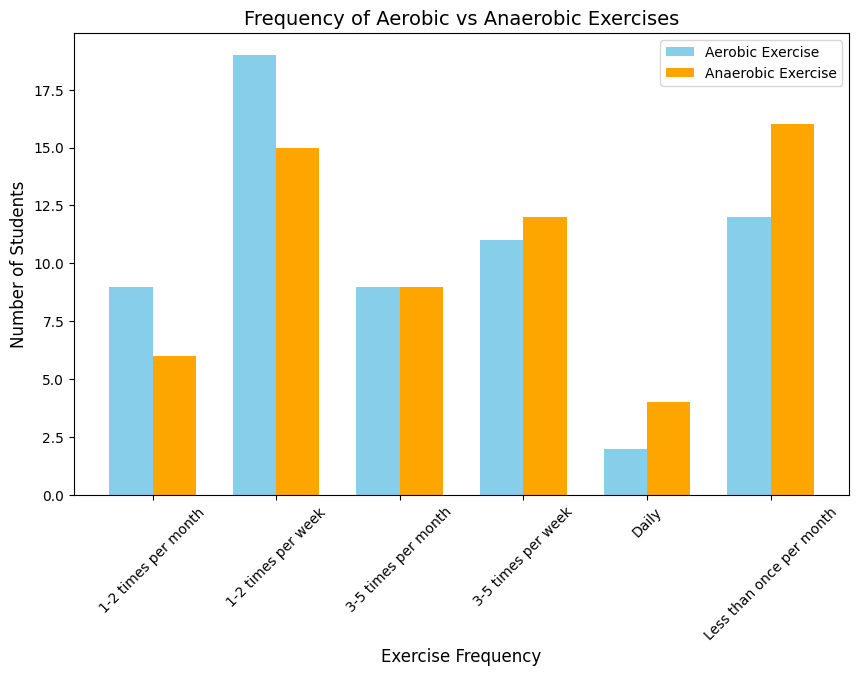

In [5]:
# Count frequency of aerobic and anaerobic exercise engagement
aerobic_freq = cleaned_survey_df['Aerobic_Exercise_Frequency'].value_counts()
anaerobic_freq = cleaned_survey_df['Anaerobic_Exercise_Frequency'].value_counts()

# Align the frequency indices (to have same categories)
categories = sorted(set(aerobic_freq.index).union(set(anaerobic_freq.index)))
aerobic_freq = aerobic_freq.reindex(categories, fill_value=0)
anaerobic_freq = anaerobic_freq.reindex(categories, fill_value=0)

# Plot the frequencies as side-by-side bars
width = 0.35  # Bar width
x = range(len(categories))

# Create figure and axis objects
plt.figure(figsize=(10, 6))

# Plotting aerobic exercise bars
plt.bar(x, aerobic_freq, width=width, color='skyblue', label='Aerobic Exercise')

# Plotting anaerobic exercise bars, offset by 'width'
plt.bar([p + width for p in x], anaerobic_freq, width=width, color='orange', label='Anaerobic Exercise')

# Set chart title and labels
plt.title('Frequency of Aerobic vs Anaerobic Exercises', fontsize=14)
plt.xlabel('Exercise Frequency', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks([p + width / 2 for p in x], categories, rotation=45)  # Position x-ticks in the middle of the bars
plt.legend()

# Display the plot
plt.show()

### 2. Correlation Between Aerobic Exercise Activity Level and Mental Health

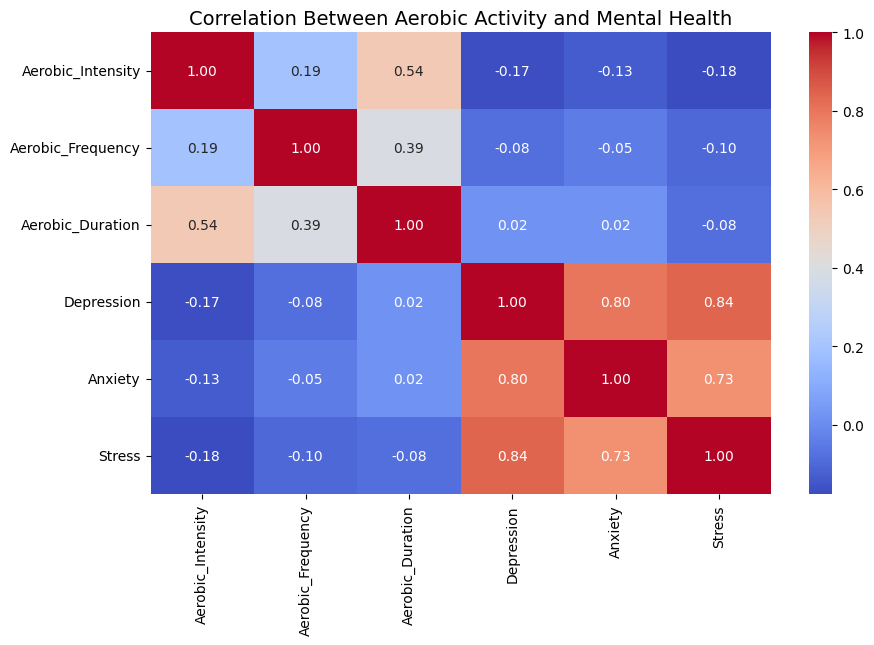

In [6]:
# Encode categorical data for correlation
cleaned_survey_df['Aerobic_Intensity'] = cleaned_survey_df['Aerobic_Exercise_Intensity'].map({'Light (Light stretching, yoga)': 1, 
                                                                    'Moderate (Brisk walking, Steady cycling)': 2, 
                                                                    'Vigorous (Running, HIIT)': 3})
cleaned_survey_df['Aerobic_Frequency'] = cleaned_survey_df['Aerobic_Exercise_Frequency'].map({'Less than once per month': 1, 
                                                                    '1-2 times per week': 2, 
                                                                    '3-5 times per week': 3, 
                                                                    'Daily': 4})
cleaned_survey_df['Aerobic_Duration'] = cleaned_survey_df['Aerobic_Exercise_Duration'].map({'Less than 30 minutes': 1, 
                                                                  '30 - 60 minutes': 2, 
                                                                  'More than 60 minutes': 3})

# Select relevant mental health columns
mental_health_cols = ['Depression', 'Anxiety', 'Stress']
mental_health_encoded = cleaned_survey_df[mental_health_cols].replace({'Normal': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3, 'Extremely Severe': 4})

# Correlation matrix
aerobic_data = cleaned_survey_df[['Aerobic_Intensity', 'Aerobic_Frequency', 'Aerobic_Duration']]
correlation = aerobic_data.join(mental_health_encoded).corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Aerobic Activity and Mental Health', fontsize=14)
plt.show()

### 3. Correlation Between Anaerobic Exercise Activity Level and Mental Health

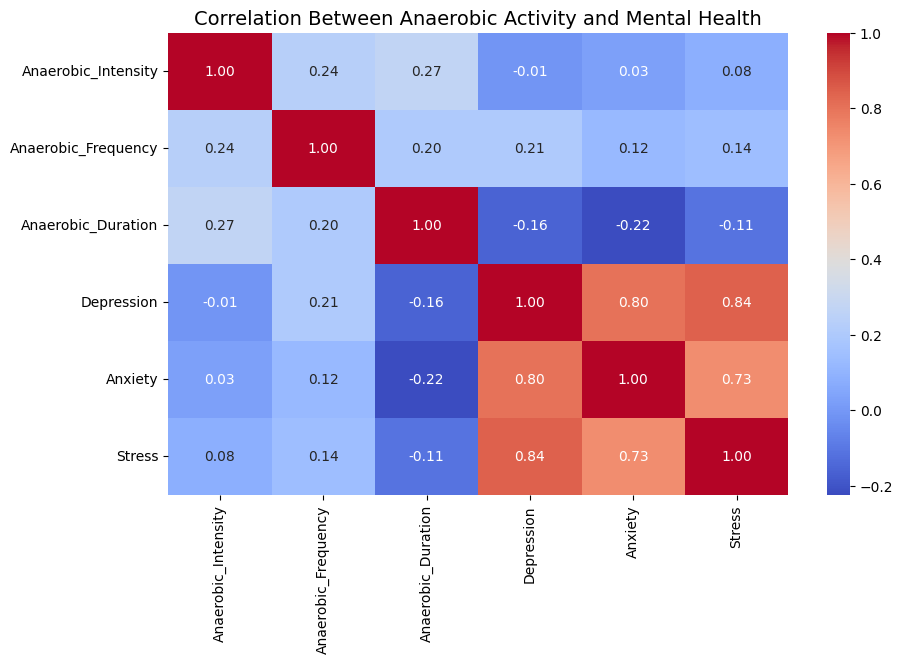

In [7]:
# Encode anaerobic data
cleaned_survey_df['Anaerobic_Intensity'] = cleaned_survey_df['Anaerobic_Exercise_Intensity'].map({'Light (Light weightlifting, yoga, Pilates)': 1, 
                                                                        'Moderate (Moderate weightlifting, circuit training)': 2, 
                                                                        'Vigorous (Heavy weightlifting, CrossFit)': 3})
cleaned_survey_df['Anaerobic_Frequency'] = cleaned_survey_df['Anaerobic_Exercise_Frequency'].map({'Less than once per month': 1, 
                                                                        '1-2 times per week': 2, 
                                                                        '3-5 times per week': 3, 
                                                                        'Daily': 4})
cleaned_survey_df['Anaerobic_Duration'] = cleaned_survey_df['Anaerobic_Exercise_Duration'].map({'Less than 30 minutes': 1, 
                                                                      '30 - 60 minutes': 2, 
                                                                      'More than 60 minutes': 3})

# Correlation matrix
anaerobic_data = cleaned_survey_df[['Anaerobic_Intensity', 'Anaerobic_Frequency', 'Anaerobic_Duration']]
correlation_anaerobic = anaerobic_data.join(mental_health_encoded).corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_anaerobic, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Anaerobic Activity and Mental Health', fontsize=14)
plt.show()

### 4. Identify the More Effective Exercise Type for Mental Health

C:\Users\Huawei\AppData\Local\Temp\ipykernel_17932\4189097432.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette='viridis')


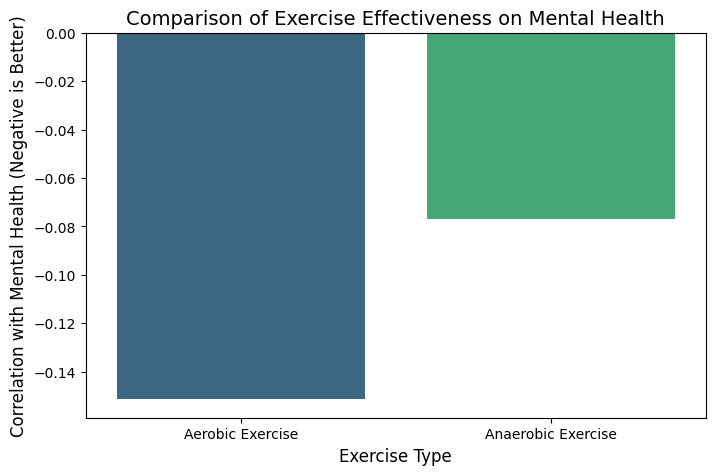

In [8]:
# Aggregate mental health scores for each exercise type
aerobic_effectiveness = aerobic_data.sum(axis=1).corr(mental_health_encoded.mean(axis=1))
anaerobic_effectiveness = anaerobic_data.sum(axis=1).corr(mental_health_encoded.mean(axis=1))

# Plot the comparison
labels = ['Aerobic Exercise', 'Anaerobic Exercise']
scores = [aerobic_effectiveness, anaerobic_effectiveness]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=scores, palette='viridis')
plt.title('Comparison of Exercise Effectiveness on Mental Health', fontsize=14)
plt.ylabel('Correlation with Mental Health (Negative is Better)', fontsize=12)
plt.xlabel('Exercise Type', fontsize=12)
plt.show()


# Comparative Impact of Aerobic and Anaerobic Physical Activities on Mental Health
This notebook analyzes the survey data collected to study the relationship between physical exercise habits and mental health among undergraduate students at the University of Malaya.

---

## Section 1: Descriptive Statistics
We will start by summarizing the data using descriptive statistics to understand the patterns of physical activity and mental health.

### Objectives:
1. Summarize demographic information (e.g., Gender).
2. Analyze exercise patterns (type, frequency, duration).
3. Describe mental health indicators (Depression, Anxiety, Stress).

In [9]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Summary statistics for exercise and mental health
summary = cleaned_survey_df.describe(include='all')
summary

,Gender,General_Health,Exercise_Duration,Aerobic_Exercise_Intensity,Aerobic_Exercise_Frequency,Aerobic_Exercise_Duration,Anaerobic_Exercise_Intensity,Anaerobic_Exercise_Frequency,Anaerobic_Exercise_Duration,Sleep_Quality,...,Exercise_Prioritization,Depression,Anxiety,Stress,Aerobic_Intensity,Aerobic_Frequency,Aerobic_Duration,Anaerobic_Intensity,Anaerobic_Frequency,Anaerobic_Duration
count,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,55.000000,44.000000,62.000000,58.000000,47.000000,62.000000
unique,2,5,4,3,6,3,4,6,3,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Male,Good,Less than 6 months,"Moderate (Brisk walking, Steady cycling)",1-2 times per week,Less than 30 minutes,"Light (Light weightlifting, yoga, Pilates)",Less than once per month,Less than 30 minutes,Good,...,Neutral,Moderate,Extremely Severe,Normal,NaN,NaN,NaN,NaN,NaN,NaN
freq,39,22,34,29,19,32,34,16,40,24,...,23,14,30,20,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.527273,2.068182,1.532258,1.413793,2.085106,1.483871
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.503857,0.846270,0.592791,0.496814,0.974229,0.718421
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000


C:\Users\Huawei\AppData\Local\Temp\ipykernel_17932\4240108563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_survey_df, x='Gender', palette='pastel')


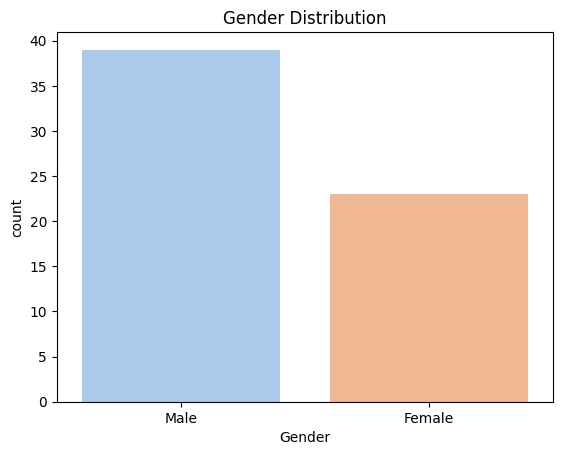

In [11]:
# Gender distribution
sns.countplot(data=cleaned_survey_df, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.show()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_17932\3659152635.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_survey_df, x=col, order=category_order, palette='coolwarm')


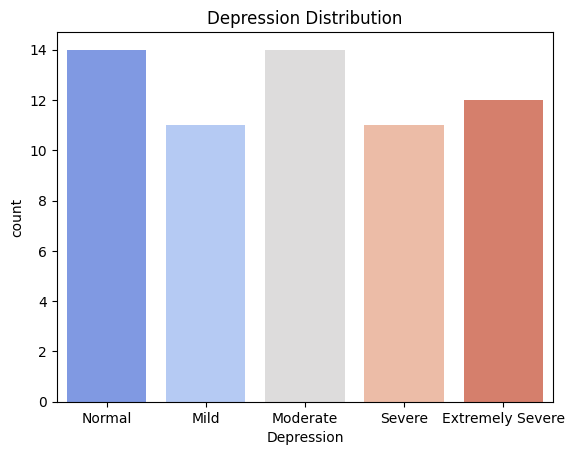

C:\Users\Huawei\AppData\Local\Temp\ipykernel_17932\3659152635.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_survey_df, x=col, order=category_order, palette='coolwarm')


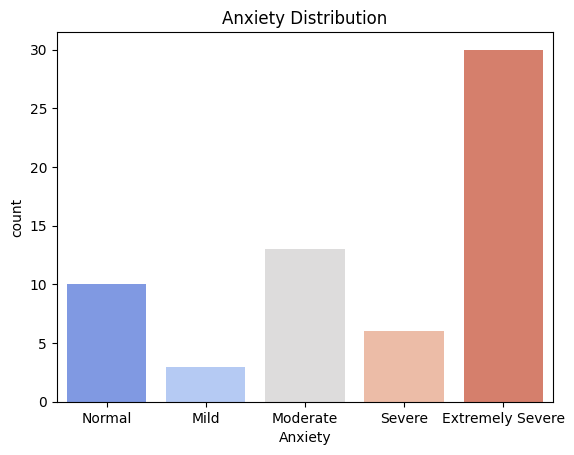

C:\Users\Huawei\AppData\Local\Temp\ipykernel_17932\3659152635.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_survey_df, x=col, order=category_order, palette='coolwarm')


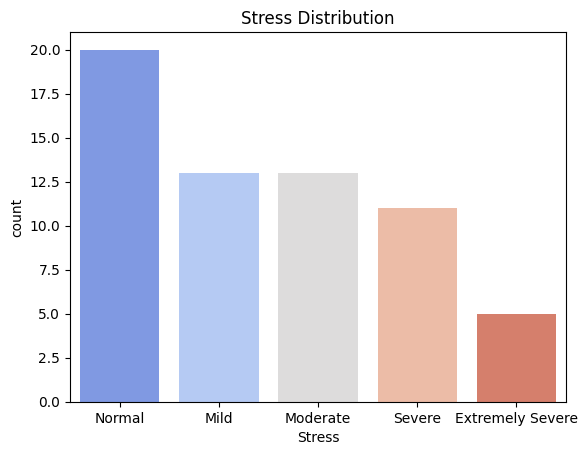

In [ ]:
# Define the desired category order
category_order = ['Normal', 'Mild', 'Moderate', 'Severe', 'Extremely Severe']

# Update the data to use categorical ordering
for col in ['Depression', 'Anxiety', 'Stress']:
    cleaned_survey_df[col] = pd.Categorical(cleaned_survey_df[col], categories=category_order, ordered=True)

# Plot distributions
for col in ['Depression', 'Anxiety', 'Stress']:
    sns.countplot(data=cleaned_survey_df, x=col, order=category_order, palette='coolwarm')
    plt.title(f'{col} Distribution')
    plt.show()

---

## Section 2: Odds Ratio and Correlation Analysis
We will assess the association between specific types of physical activity (aerobic and anaerobic) and mental health outcomes. Odds ratios will help quantify these relationships.

### Objectives:
1. Calculate Odds Ratios for the relationship between exercise type and mental health outcomes.
2. Perform correlation analysis to study the strength of associations.

In [17]:
from scipy.stats import chi2_contingency
import numpy as np

In [18]:
# Create a contingency table for Aerobic Exercise Frequency vs Depression
contingency_table = pd.crosstab(cleaned_survey_df['Aerobic_Exercise_Frequency'], cleaned_survey_df['Depression'])

In [19]:
# Perform chi-square test and calculate Odds Ratio
chi2, p, dof, ex = chi2_contingency(contingency_table)
odds_ratio = (contingency_table.values[0, 0] * contingency_table.values[1, 1]) / (contingency_table.values[0, 1] * contingency_table.values[1, 0])
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")
print(f"Odds Ratio: {odds_ratio}")


Chi-Square Statistic: 17.94502296834833, p-value: 0.5910299605714391
Odds Ratio: 4.0


In [27]:
# Map frequency and mental health levels to numeric scales
frequency_mapping = {
    'Less than once per month': 1,
    '1-2 times per week': 2,
    '3-5 times per week': 3,
    'Daily': 4
}

mental_health_mapping = {
    'Normal': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3,
    'Extremely Severe': 4
}

# Replace non-numeric values with their corresponding numeric scales
exercise_mental_health = cleaned_survey_df[['Aerobic_Exercise_Frequency', 'Anaerobic_Exercise_Frequency', 'Depression', 'Anxiety', 'Stress']].copy()
exercise_mental_health['Aerobic_Exercise_Frequency'] = exercise_mental_health['Aerobic_Exercise_Frequency'].map(frequency_mapping)
exercise_mental_health['Anaerobic_Exercise_Frequency'] = exercise_mental_health['Anaerobic_Exercise_Frequency'].map(frequency_mapping)
exercise_mental_health['Depression'] = exercise_mental_health['Depression'].map(mental_health_mapping)
exercise_mental_health['Anxiety'] = exercise_mental_health['Anxiety'].map(mental_health_mapping)
exercise_mental_health['Stress'] = exercise_mental_health['Stress'].map(mental_health_mapping)

# Compute the correlation matrix
corr_matrix = exercise_mental_health.corr()

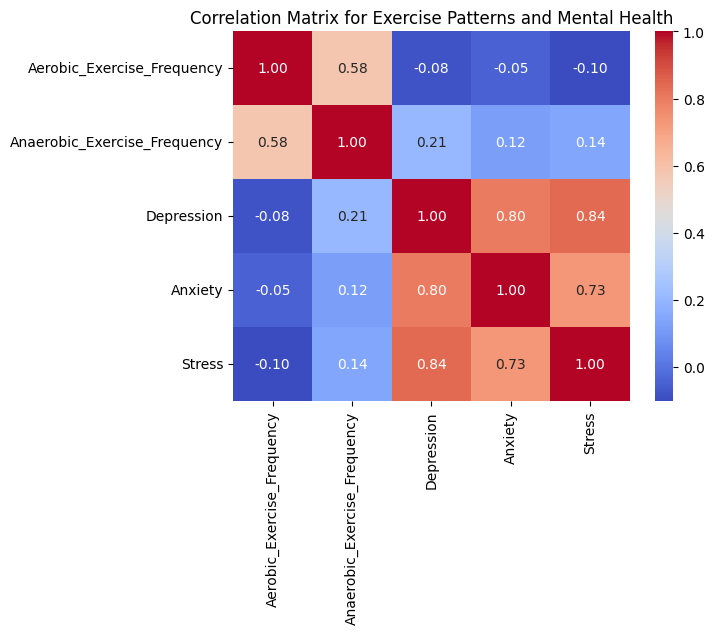

In [26]:
# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Exercise Patterns and Mental Health")
plt.show()

---

## Section 3: Comparative Metrics and Hypotheses Testing
Here, we will quantify the differences between aerobic and anaerobic groups using effect sizes and test hypotheses.

### Objectives:
1. Quantify the difference between aerobic and anaerobic groups (e.g., Cohen's d).
2. Test hypotheses on which exercise type has a stronger association with mental health.


In [28]:
from scipy.stats import ttest_ind

In [29]:
# Example: Depression scores for Aerobic vs Anaerobic exercises
aerobic_group = cleaned_survey_df[cleaned_survey_df['Aerobic_Exercise_Frequency'] == 'Daily']['Depression'].replace({'Severe': 3, 'Moderate': 2, 'Mild': 1})
anaerobic_group = cleaned_survey_df[cleaned_survey_df['Anaerobic_Exercise_Frequency'] == 'Daily']['Depression'].replace({'Severe': 3, 'Moderate': 2, 'Mild': 1})


In [ ]:
# Calculate t-test and Cohen's d
t_stat, p_value = ttest_ind(aerobic_group, anaerobic_group, equal_var=False)
cohen_d = (aerobic_group.mean() - anaerobic_group.mean()) / np.sqrt((aerobic_group.std() ** 2 + anaerobic_group.std() ** 2) / 2)

print(f"T-Test Statistic: {t_stat}, p-value: {p_value}")
print(f"Cohen's d: {cohen_d}")


In [ ]:
# Visualize the comparison
sns.boxplot(data=cleaned_survey_df, x='Aerobic_Exercise_Frequency', y='Depression', palette='muted')
plt.title('Aerobic Exercise Frequency vs Depression')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'Severe', 'Moderate', 'Mild' with corresponding numeric values
cleaned_survey_df['Depression'] = cleaned_survey_df['Depression'].replace({
    'Severe': 3, 'Moderate': 2, 'Mild': 1
})

# Exclude rows where 'Depression' is still non-numeric (e.g., 'Normal')
cleaned_survey_df = cleaned_survey_df[pd.to_numeric(cleaned_survey_df['Depression'], errors='coerce').notna()]
cleaned_survey_df['Depression'] = cleaned_survey_df['Depression'].astype(float)

# Extract groups for analysis
aerobic_group = cleaned_survey_df[cleaned_survey_df['Aerobic_Exercise_Frequency'] == 'Daily']['Depression']
anaerobic_group = cleaned_survey_df[cleaned_survey_df['Anaerobic_Exercise_Frequency'] == 'Daily']['Depression']

# Perform statistical analysis (e.g., t-test) and calculate Cohen's d
from scipy.stats import ttest_ind
import numpy as np

t_stat, p_value = ttest_ind(aerobic_group, anaerobic_group)
cohens_d = (aerobic_group.mean() - anaerobic_group.mean()) / np.sqrt(
    (aerobic_group.std() ** 2 + anaerobic_group.std() ** 2) / 2
)

print(f"T-statistic: {t_stat}, P-value: {p_value}, Cohen's d: {cohens_d}")

# Plot results
plt.boxplot([aerobic_group, anaerobic_group], labels=['Aerobic', 'Anaerobic'])
plt.title('Depression Levels by Exercise Type')
plt.ylabel('Depression Score')
plt.show()


In [37]:
# Replace non-numeric values with NaN
cleaned_survey_df['Depression'] = pd.to_numeric(cleaned_survey_df['Depression'], errors='coerce')

# Drop rows where 'Depression' is NaN
cleaned_survey_df = cleaned_survey_df.dropna(subset=['Depression'])

# Convert 'Depression' to float
cleaned_survey_df['Depression'] = cleaned_survey_df['Depression'].astype(float)

# Extract groups for analysis
aerobic_group = cleaned_survey_df[cleaned_survey_df['Aerobic_Exercise_Frequency'] == 'Daily']['Depression']
non_aerobic_group = cleaned_survey_df[cleaned_survey_df['Aerobic_Exercise_Frequency'] == 'Never']['Depression']

# Print results for verification
print("Aerobic Group Depression Levels:")
print(aerobic_group)

print("\nNon-Aerobic Group Depression Levels:")
print(non_aerobic_group)


Aerobic Group Depression Levels:
53    2.0
Name: Depression, dtype: float64

Non-Aerobic Group Depression Levels:
Series([], Name: Depression, dtype: float64)
